# Кездейсоқ орман (Random Forest) алгоритмі

Бұл сабақта біз **Кездейсоқ орман (Random Forest)** алгоритмін қолдануды жалғастырамыз. Алдыңғы сабақта банкноттарды анықтасақ, бүгін күрделірек, медициналық мәселені қарастырамыз.

**Біздің мақсатымыз:** Пациенттің медициналық көрсеткіштеріне (қан қысымы, глюкоза деңгейі, жасы, т.б.) негізделе отырып, онда **диабеттің бар (1)** немесе **жоқ (0)** екенін болжау.

**Деректер жиынтығы (Dataset):**
Біз "Pima Indians Diabetes Database" деп аталатын танымал медициналық деректер жиынтығын қолданамыз. Бұл деректерде 21 жастан асқан әйелдердің денсаулық көрсеткіштері жиналған.

Дереккөз URL: `https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv`





## 1-қадам. Қажетті кітапханаларды жүктеу

Деректерді өңдеу, визуализациялау және машиналық оқыту моделін құру үшін стандартты Python кітапханаларын қосып алайық.

* **pandas** – кестелік деректермен жұмыс істеу үшін.
* **numpy** – сандық есептеулер үшін.
* **seaborn** және **matplotlib** – графиктер сызу үшін.
* **sklearn** (scikit-learn) – машиналық оқыту алгоритмдері үшін.

In [ ]:
# Деректерді өңдеуге арналған кітапханалар
import pandas as pd
import numpy as np

# Визуализация (графиктер) үшін
import seaborn as sns
import matplotlib.pyplot as plt

# Ескерту хабарламаларын өшіру (ноутбук таза болуы үшін)
import warnings
warnings.filterwarnings('ignore')

## 2-қадам. Деректерді жүктеу

Біз CSV форматындағы деректерді интернеттен тікелей жүктейміз. Бұл файлда да баған атаулары жоқ, сондықтан оларды сипаттамасына сәйкес өзіміз береміз.

**Бағандардың мағынасы (Медициналық көрсеткіштер):**

1. **Pregnancies** – Жүктілік саны.
2. **Glucose** – Глюкоза деңгейі.
3. **BloodPressure** – Қан қысымы.
4. **SkinThickness** – Тері қатпарларының қалыңдығы.
5. **Insulin** – Инсулин деңгейі.
6. **BMI** – Дене салмағының индексі.
7. **DiabetesPedigreeFunction** – Диабеттің тұқым қуалау ықтималдығы.
8. **Age** – Жасы.
9. **Outcome** – Нысаналы айнымалы (Target):
* `0` – Диабет жоқ.
* `1` – Диабет бар.


In [ ]:
# Деректер жиынтығының сілтемесі
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

# Баған атауларын анықтау (себебі бастапқы файлда олар жоқ)
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Деректерді оқу
df = pd.read_csv(url, names=column_names)

# Алғашқы 5 жолды көрсету
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1




## 3-қадам. Деректерді талдау (EDA)

Модель құрмас бұрын деректердің сапасын тексеріп, олармен танысу қажет.

1. Деректер типтерін және бос мәндердің бар-жоғын тексереміз.
2. Негізгі статистикалық көрсеткіштерге қараймыз (мысалы, глюкозаның орташа деңгейі қандай?).
3. Диабеті бар және жоқ адамдардың саны тең бе, соны тексереміз.


In [ ]:
# Деректер туралы жалпы ақпаратты шығару
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Статистикалық сипаттама (орташа мән, стандартты ауытқу және т.б.)
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Outcome
0    500
1    268
Name: count, dtype: int64


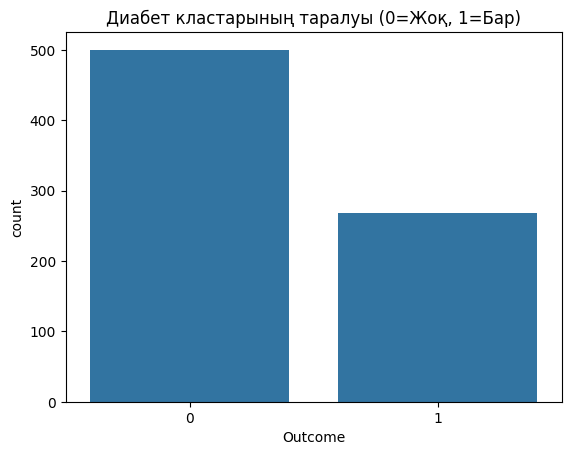

In [ ]:
# Кластардың таралуын тексеру (Диабет бар және жоқ адамдар саны)
print(df['Outcome'].value_counts())

# График түрінде көрсету
sns.countplot(x='Outcome', data=df)
plt.title('Диабет кластарының таралуы (0=Жоқ, 1=Бар)')
plt.show()

## 4-қадам. Деректерді дайындау

Машиналық оқыту үшін деректерді екі негізгі бөлікке бөлеміз:

1. **X (Features - Белгілер):** Болжам жасау үшін қолданылатын бағандар (жасы, глюкоза, қан қысымы және т.б.).
2. **y (Target - Нысана):** Біз болжағымыз келетін нәтиже (Outcome - диабеттің бар/жоғы).

Содан кейін, модельдің жаттап алуын (overfitting) болдырмау және оның сапасын шынайы бағалау үшін деректерді **Оқыту (Train)** және **Тестілеу (Test)** жиындарына бөлеміз.


In [ ]:
from sklearn.model_selection import train_test_split

# Белгілер (X) мен нысаналы айнымалыны (y) бөлу
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Деректерді оқыту (80%) және тестілеу (20%) жиындарына бөлу
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# stratify=y параметрі екі жиында да кластардың (0 мен 1) үлесін бірдей сақтау үшін маңызды.

# Бөлінген деректердің өлшемін тексеру
print("Оқыту жиынтығының өлшемі:", X_train.shape)
print("Тестілеу жиынтығының өлшемі:", X_test.shape)

Оқыту жиынтығының өлшемі: (614, 8)
Тестілеу жиынтығының өлшемі: (154, 8)




## Теориялық шолу: Кездейсоқ орман

**Кездейсоқ орман (Random Forest)** — бұл ансамбльдік әдіс. Оның негізгі идеясын қайталайық:

1. **Шешім ағашы (Decision Tree):** Бұл деректерді сұрақтар қою арқылы бөлетін қарапайым модель. Мысалы: "Глюкоза деңгейі 140-тан жоғары ма?". Бірақ жалғыз ағаш көбінесе тұрақсыз болады.
2. **Орман құру:** Біз бір емес, жүздеген шешім ағаштарын құрамыз.
3. **Кездейсоқтық (Randomness):** Әрбір ағаш деректердің тек кездейсоқ ішкі жиынтығын көреді және әр қадамда белгілердің (features) тек кездейсоқ бөлігін ғана пайдаланады. Бұл ағаштардың бір-біріне ұқсамауын қамтамасыз етеді.
4. **Көпшілік шешімі (Voting):** Жаңа пациент келгенде, ормандағы барлық ағаштар өз болжамын жасайды. Егер көптеген ағаштар "Диабет бар" десе, модельдің қорытынды шешімі солай болады.

Бұл тәсіл модельді дәлірек және жаңа деректерге бейімделгіш етеді.

## 5-қадам. Модельді құру және оқыту

Біз `scikit-learn` кітапханасындағы `RandomForestClassifier` класын қолданамыз.
Модельді құрып, оны `X_train` және `y_train` деректері арқылы "үйретеміз" (fit әдісі).



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Модельді инициализациялау (мысалы, 200 ағаштан тұратын орман)
# random_state нәтиженің тұрақты болуы үшін қажет
model = RandomForestClassifier(n_estimators=200, random_state=42)

# Модельді оқыту деректерінде үйрету
model.fit(X_train, y_train)

print("Модель сәтті оқытылды!")

Модель сәтті оқытылды!



## 6-қадам. Модельді бағалау

Модель оқытылып болды. Енді оның бұрын көрмеген деректерде (`X_test`) қаншалықты жақсы жұмыс істейтінін тексерейік.

Біз негізгі метрикаларды қарастырамыз:

* **Accuracy (Дәлдік):** Дұрыс болжамдардың пайызы.
* **Confusion Matrix (Шатасу матрицасы):** Қателердің түрлерін көрсетеді (мысалы, диабеті бар адамды "сау" деп қателесу немесе керісінше). Медицинада бұл өте маңызды.


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Тест деректері бойынша болжам жасау
predictions = model.predict(X_test)

# Жалпы дәлдікті есептеу
acc = accuracy_score(y_test, predictions)
print(f"Модельдің тесттегі дәлдігі (Accuracy): {acc * 100:.2f}%")

Модельдің тесттегі дәлдігі (Accuracy): 74.68%



**Шатасу матрицасын (Confusion Matrix) визуализациялау:**

* **True Negative (TN):** Диабеті жоқ адамды дұрыс анықтады.
* **False Positive (FP):** Диабеті жоқ адамды "диабеті бар" деп қателесті (І-типтегі қате).
* **False Negative (FN):** Диабеті бар адамды "сау" деп қателесті (ІІ-типтегі қате - медицинада өте қауіпті!).
* **True Positive (TP):** Диабеті бар адамды дұрыс анықтады.



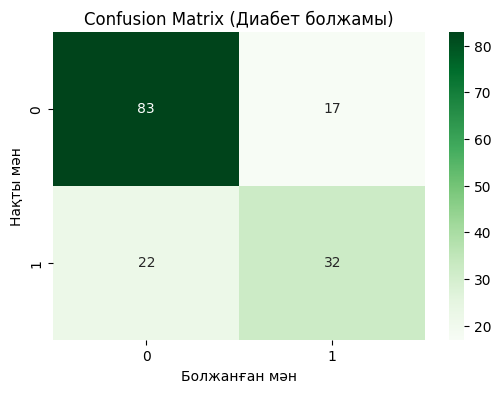

In [ ]:
# Шатасу матрицасын құру
cm = confusion_matrix(y_test, predictions)

# Матрицаны heatmap арқылы сызу
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Болжанған мән')
plt.ylabel('Нақты мән')
plt.title('Confusion Matrix (Диабет болжамы)')
plt.show()

Толық классификациялық есеп (Precision, Recall, F1-score көрсеткіштері)

In [ ]:

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       100
           1       0.65      0.59      0.62        54

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154





## 8-қадам. Белгілердің маңыздылығы (Feature Importance)

Кездейсоқ орманның ең пайдалы мүмкіндіктерінің бірі ол диабетті болжау үшін қай медициналық көрсеткіштің ең маңызды екенін көрсете алады. Бұл дәрігерлер үшін құнды ақпарат болуы мүмкін.



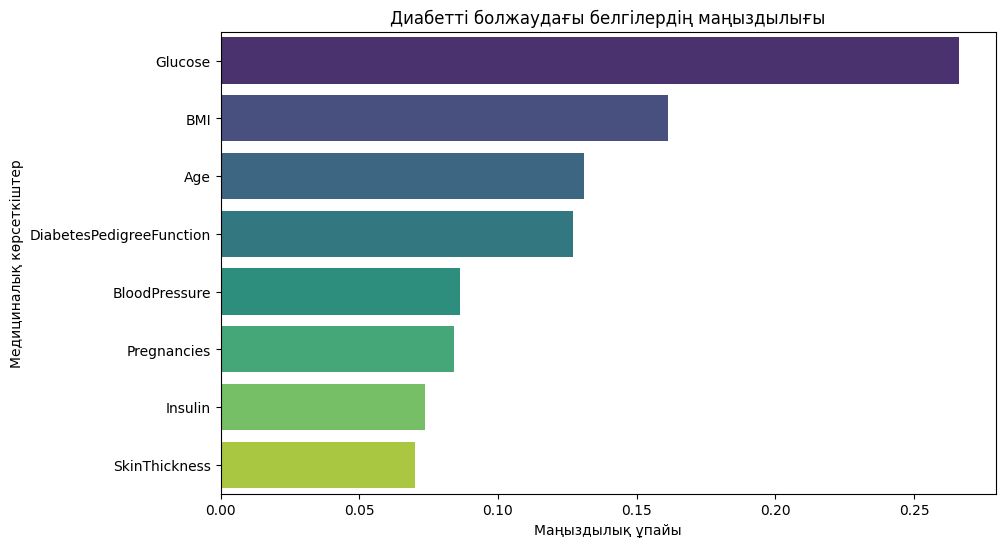

In [ ]:
# Маңыздылық деңгейлерін алу және сұрыптау
feature_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# График сызу
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp, y=feature_imp.index, palette='viridis')
plt.xlabel('Маңыздылық ұпайы')
plt.ylabel('Медициналық көрсеткіштер')
plt.title('Диабетті болжаудағы белгілердің маңыздылығы')
plt.show()


## Қорытынды

Бұл сабақта біз:

1. **Кездейсоқ орман** алгоритмін нақты медициналық деректер жиынтығында (Pima Indians Diabetes) қолдандық.
2. Деректерді жүктеп, талдап, машиналық оқытуға дайындадық.
3. Модельді оқытып, оның нәтижесін дәлдік (accuracy) және шатасу матрицасы (confusion matrix) арқылы бағаладық.
4. Диабетті анықтауда ең маңызды рөл атқаратын факторларды (мысалы, Глюкоза деңгейі) анықтадық.

Кездейсоқ орман — күрделі байланыстары бар медициналық деректер үшін өте қолайлы және қуатты алгоритм.